# Выбор локации для скважины

Компании «ГлавРосГосНефть» нужно помочь с решением, где бурить новую скважину. В избранном регионе собирают информацию о качестве нефти и объёме её запасов для каждой скважины. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски.


### Описание данных

- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек
- `product` — объём запасов в скважине (тыс. баррелей).

Каждый файл соответствует своему региону.

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Информация о таблице, наличие пропусков 
def get_dataset(path, sep):
    df = pd.read_csv(path, sep=sep)
    display(df.head())
    df.info()
    display((df.isna().mean() * 100).sort_values(ascending=False).to_frame(name='пропуски_в_%'))
    return df

In [3]:
# Проверка наличия директории 
def check_dataset(path0, path1, sep):
    if os.path.exists(path0):
        return get_dataset(path0, sep)
    elif os.path.exists(path1):
        return get_dataset(path0, sep)
    else:
        print('неправильный путь к файлу')

In [4]:
path0 = './datasets/geo_data_0.csv'
path1 = '/datasets/geo_data_0.csv'

geo_data_0 = check_dataset(path0, path1, sep=',')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,пропуски_в_%
id,0.0
f0,0.0
f1,0.0
f2,0.0
product,0.0


Датасет состоит из 100.000 наблюдений. Пропуски и неправильные типы данных отсутствуют.

In [5]:
path0 = './datasets/geo_data_1.csv'
path1 = '/datasets/geo_data_1.csv'

geo_data_1 = check_dataset(path0, path1, sep=',')

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,пропуски_в_%
id,0.0
f0,0.0
f1,0.0
f2,0.0
product,0.0


In [6]:
path0 = './datasets/geo_data_2.csv'
path1 = '/datasets/geo_data_2.csv'

geo_data_2 = check_dataset(path0, path1, sep=',')

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,пропуски_в_%
id,0.0
f0,0.0
f1,0.0
f2,0.0
product,0.0


#### Вывод загрузки данных

Все датасеты не имеют пропусков, неправильных типов данных.

### Предобработка данных

In [7]:
print('Количество неявных дубликатов')
print('geo_data_0:', geo_data_0.duplicated(subset=['f0', 'f1', 'f2']).sum())
print('geo_data_1:', geo_data_1.duplicated(subset=['f0', 'f1', 'f2']).sum())
print('geo_data_2:', geo_data_2.duplicated(subset=['f0', 'f1', 'f2']).sum())

Количество неявных дубликатов
geo_data_0: 0
geo_data_1: 0
geo_data_2: 0


#### Вывод предобработки данных

Датасеты были проверены на дубликаты по входным признакам. В случае дубликатов, линейная модель может переобучиться на повторяющихся данных и иметь неверные коэффициенты.

### Исследовательский анализ

#### Распределение признаков

In [8]:
def plt_distribution(df):
    plt.figure(figsize=(22, 10))
    cols = df.select_dtypes(include='number').columns
    df = df[cols].copy()

    for i, clm in enumerate(cols):
        plt.subplot(2, 2, i+1)
        if df[clm].nunique() >= 20:
            ax = sns.histplot(data=df, x=clm, stat="density")
            sns.kdeplot(data=df, x=clm, bw_method=0.07, color="red")
        else:
            df[f'rounded_{clm}'] = round(df[clm], 2)
            ax = sns.countplot(data=df, x=f'rounded_{clm}', color='#1F77B4') 
        ax.set_ylabel('количество')

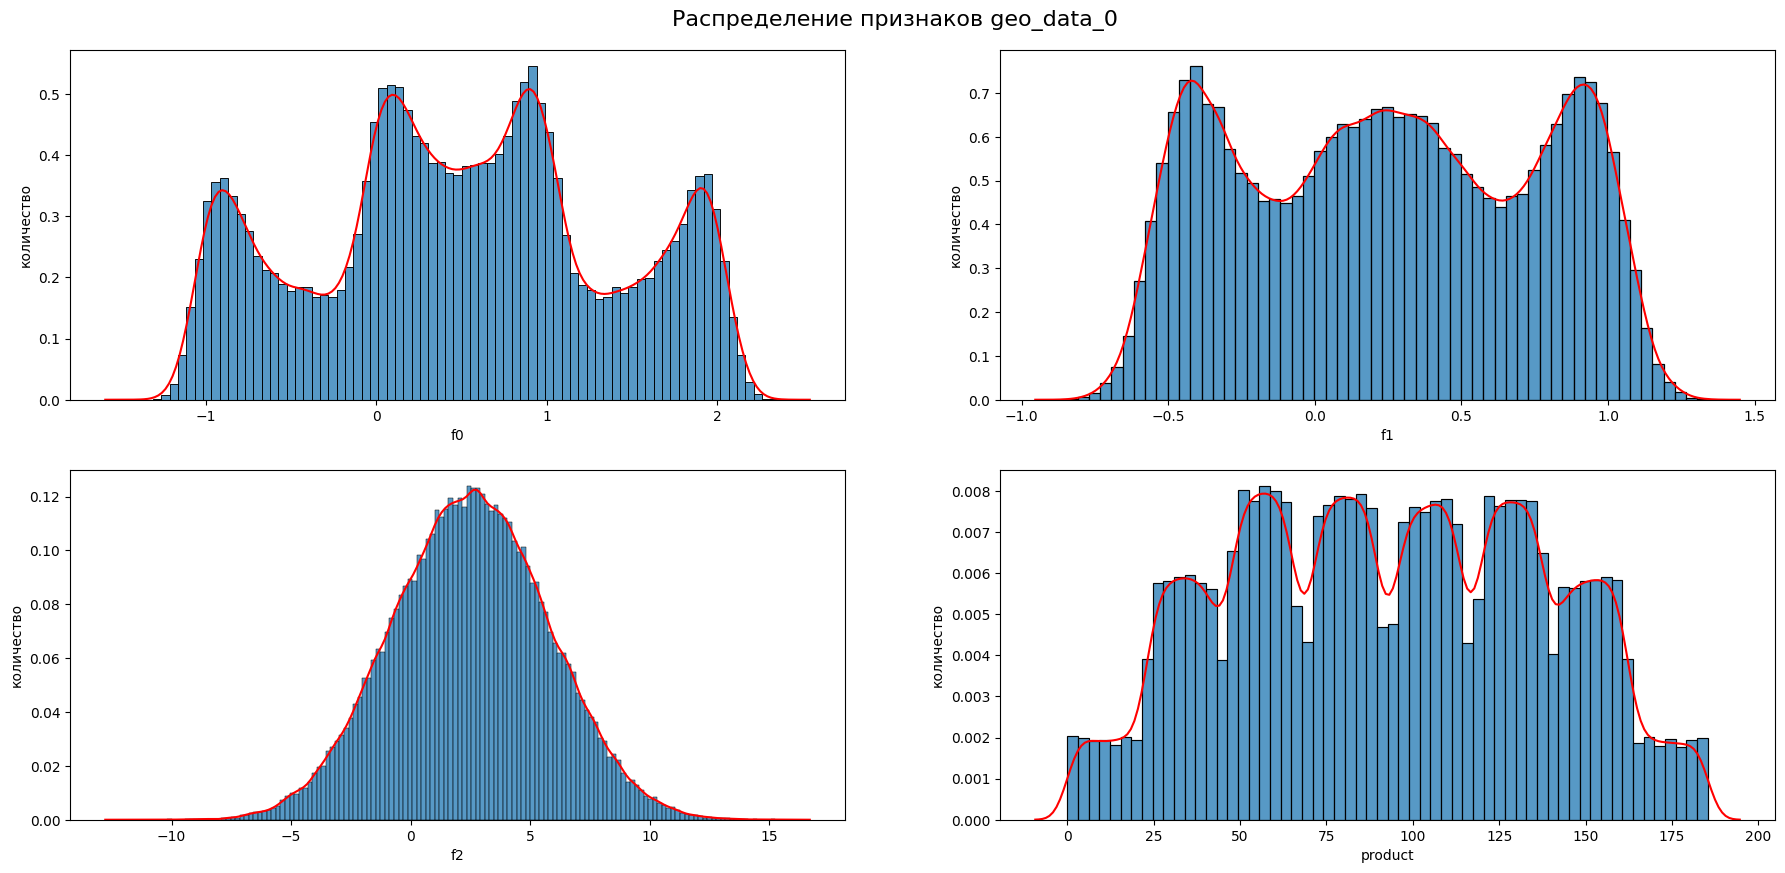

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [9]:
plt_distribution(geo_data_0)
plt.suptitle('Распределение признаков geo_data_0', fontsize=16, y=0.92)
plt.show()

geo_data_0.describe()

По распределениям признаков видно, что данные сильно синтетические. Каждый из признаков имеент уникальное распределение:
1. `f0`: мультимодальное распределение с 4-мя вершинами
2. `f1`: мультимодальное распределение с 3-мя вершинами
3. `f2`: нормальное распределение
4. `product`: необычное распределение с множеством равномерных впадин и пиков

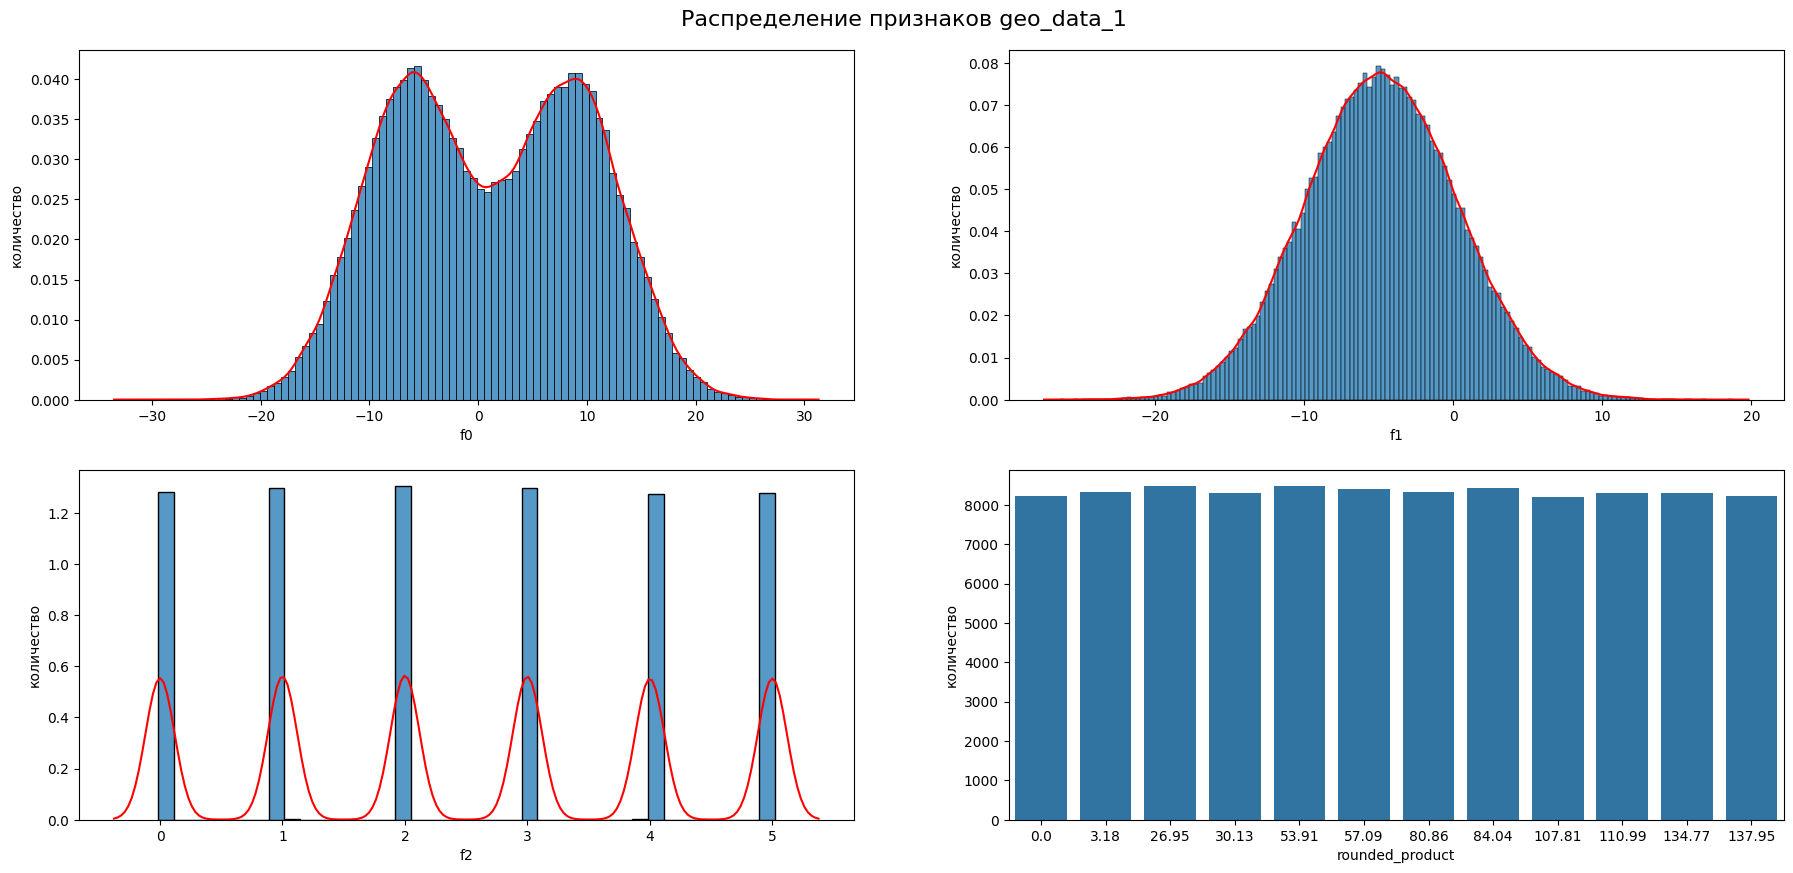

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [10]:
plt_distribution(geo_data_1)
plt.suptitle('Распределение признаков geo_data_1', fontsize=16, y=0.92)
plt.show()

geo_data_1.describe()

1. `f0`: бимодальное распределением
2. `f1`: нормальное распределение
3. `f2`: шумный признак, значения кучкуются у целых в равных пропорциях. 
4. `product`: 12 уникальных значений, распределенных равномерно.

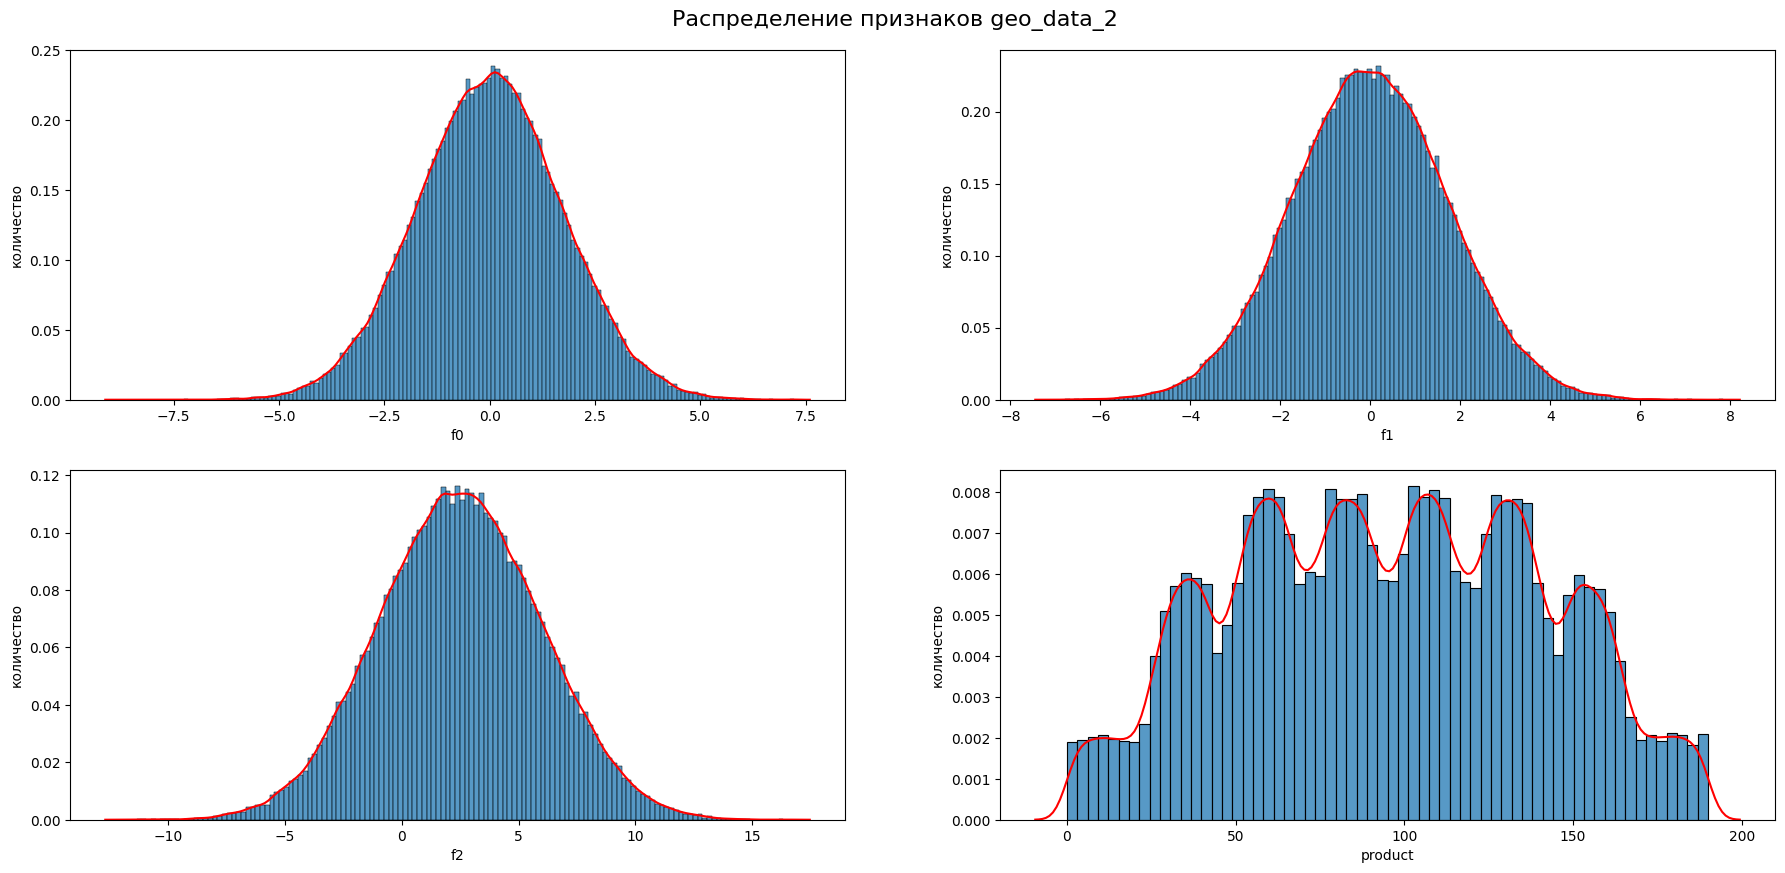

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [11]:
plt_distribution(geo_data_2)
plt.suptitle('Распределение признаков geo_data_2', fontsize=16, y=0.92)
plt.show()

geo_data_2.describe()

1. `f0`: нормальное распределение
2. `f1`: нормальное распределение
3. `f2`: нормальное распределение
4. `product`: схоже с распределением из geo_data_0

**Промежуточный вывод:**

В каждом из датасетов данные являются синтетическими. \
В регионе **`geo_data_1`** количество запасов в скважине имеет равномерное распределение, признак состоит из 12 уникальных категорий и наибольшее значение - 138 тыс. баррелей, что меньше по сравнению с двумя другими регионами. В данном регионе признак точек `f2` можно округлить и перевести в категориальный. 

#### Выбросы и аномалии

In [12]:
# Функция для отрисовки диаграммы размаха количественных признаков
def plt_boxplot_scaler(df):
    plt.figure(figsize=(12, 6))
    scaled = MinMaxScaler()
    
    num_columns = [clm for clm in df.select_dtypes(include='number').columns.tolist() if df[clm].nunique() >= 20]
    sns.boxplot(data=pd.DataFrame(data=scaled.fit_transform(df[num_columns]), columns=num_columns), orient='v')


In [20]:
# Функция для избавления от выбросов в количественных признаках
def get_emission_free(df):
    cols = [clm for clm in df.select_dtypes(include='number').columns.tolist() if df[clm].nunique() >= 20]
    for clm in cols:
        IQR = df[clm].quantile(0.75) - df[clm].quantile(0.25)
        minimum = df[clm].quantile(0.25) - 1.5 * IQR
        maximum = df[clm].quantile(0.75) + 1.5 * IQR
        df.query(f'({clm} >= @minimum) and ({clm} <= @maximum)', inplace=True)

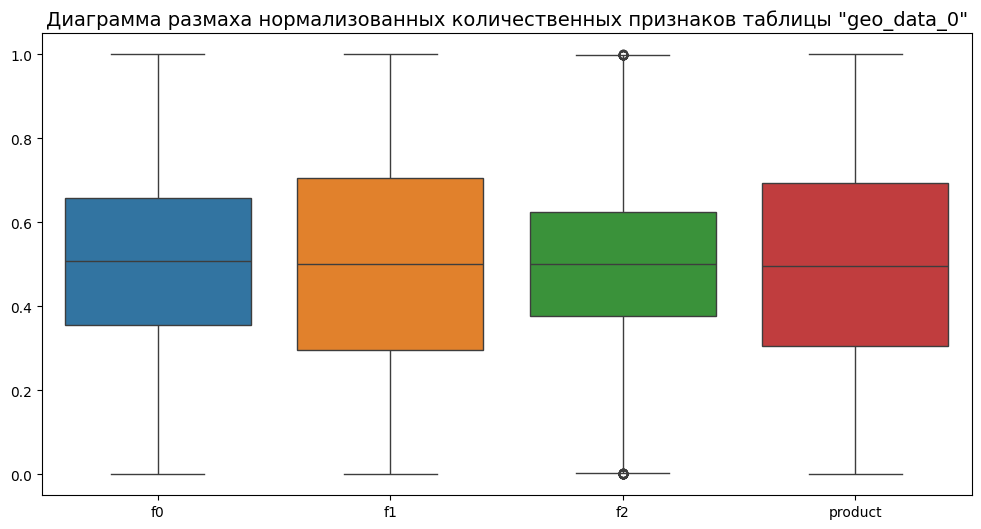

In [19]:
plt_boxplot_scaler(geo_data_0)
plt.title('Диаграмма размаха нормализованных количественных признаков таблицы "geo_data_0"', fontsize=14)
plt.show()

In [ ]:
get_emission_free(geo_data_0)
# СДЕЛАТЬ ДЕКОРАТОР!
# БОКСПЛОТ -> УДАЛЕНИЕ ВЫБРОСОВ -> БОКСПЛОТ

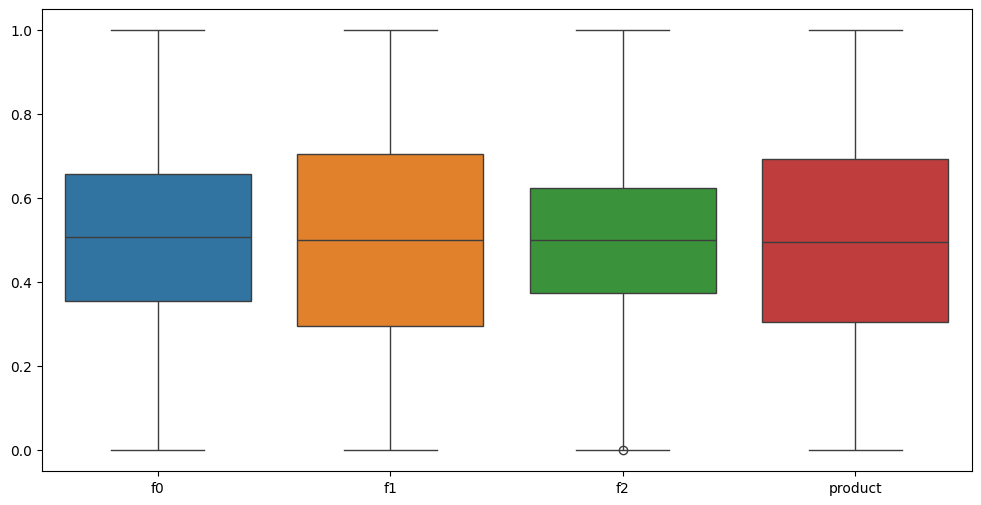

In [16]:
IQR = geo_data_0['f2'].quantile(0.75) - geo_data_0['f2'].quantile(0.25)
min_f2 = geo_data_0['f2'].quantile(0.25) - 1.5 * IQR 
max_f2 = geo_data_0['f2'].quantile(0.75) + 1.5 * IQR


plt_boxplot_scaler(geo_data_0.query('f2 >= @min_f2').query('f2 <= @max_f2'))